In [8]:
# Importing necesary packages
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.preprocessing import scale

In [9]:
class CancerAnalysis:
    def __init__(self,path,index=469):
        data = np.genfromtxt(path,delimiter=',')
        # Remove nans
        data = data[~np.isnan(data).any(axis=1)]
        self.X_train= data[1:index,2:]
        self.Y_train = data[1:index,1]
        self.X_test = data[index+1:,2:]
        self.Y_test = data[index+1:,1]
        '''
        print self.X_train
        print self.Y_train
        print self.X_test
        print self.Y_test
        '''
        
    def byknn(self):
        print ("Result By KNN")
        training_accuracy = []
        test_accuracy = []
        for n_neighbors in range(1,100):
            clf = KNeighborsClassifier(n_neighbors= n_neighbors)
            clf.fit(self.X_train,self.Y_train)
            training_accuracy.append(clf.score(self.X_train,self.Y_train))
            test_accuracy.append(clf.score(self.X_test,self.Y_test))
            print ("Training at neighbors = "+str(n_neighbors),clf.score(self.X_test,self.Y_test))
        plt.plot(range(1,100),training_accuracy,label="Training")
        plt.plot(range(1,100),test_accuracy, label = "Test")
        print ("Max Accuracy "+str(max(test_accuracy))+"At Neighbors = "+str(test_accuracy.index(max(test_accuracy))+1))
        max_index = test_accuracy.index(max(test_accuracy))+1
        plt.plot(max_index,max(test_accuracy), 'ro',label="MAX")
        plt.ylabel('% accuracy')
        plt.xlabel('Neighbors')
        plt.legend()
        plt.show()
        return max(test_accuracy)
             
    def bylogistic(self):
        print ("Result By Logistic Regression")
        training_accuracy = []
        test_accuracy = []
        for i in range(1,30):
            clf = LogisticRegression(C=i,solver='liblinear').fit(self.X_train,self.Y_train)
            print (clf.score(self.X_test,self.Y_test))
            training_accuracy.append(clf.score(self.X_train,self.Y_train))
            test_accuracy.append(clf.score(self.X_test,self.Y_test))
        plt.plot(range(1,30),training_accuracy,label="Training")
        plt.plot(range(1,30),test_accuracy, label = "Test")
        print ("Max Accuracy "+str(max(test_accuracy))+"At Inverse Regularization = "+str(test_accuracy.index(max(test_accuracy))+1))
        max_index = test_accuracy.index(max(test_accuracy))+1
        plt.plot(max_index,max(test_accuracy), 'ro',label="MAX")
        plt.ylabel('% accuracy')
        plt.xlabel('Inverse Regularization')
        plt.legend()
        plt.show()

        return max(test_accuracy)
    from sklearn.svm import LinearSVC

    def bysvm(self):
        print ("Result By SVM")
        training_accuracy = []
        test_accuracy = []
        for i in range(1, 30):
            clf = LinearSVC(C=i, dual=True, max_iter=10000)  # Increase max_iter
            clf.fit(self.X_train, self.Y_train)
            training_accuracy.append(clf.score(self.X_train, self.Y_train))
            test_accuracy.append(clf.score(self.X_test, self.Y_test))
            print (clf.score(self.X_test, self.Y_test))
        plt.plot(range(1,30),training_accuracy,label="Training")
        plt.plot(range(1,30),test_accuracy, label = "Test")
        print ("Max Accuracy "+str(max(test_accuracy))+"At Inverse Regularization = "+str(test_accuracy.index(max(test_accuracy))+1))
        max_index = test_accuracy.index(max(test_accuracy))+1
        plt.plot(max_index,max(test_accuracy), 'ro',label="MAX")
        plt.ylabel('% accuracy')
        plt.xlabel('Inverse Regularization')
        plt.legend()
        plt.show()
        
        return max(test_accuracy)        
    def bydtree(self):
        print ("Result By Decision Tree Classifier")
        training_accuracy = []
        test_accuracy = []
        for i in range(1,10):
            clf = DecisionTreeClassifier(random_state = 0,max_depth=i )
            clf.fit(self.X_train,self.Y_train)
         
            print (clf.score(self.X_test,self.Y_test))
            training_accuracy.append(clf.score(self.X_train,self.Y_train))
            test_accuracy.append(clf.score(self.X_test,self.Y_test))
        
        plt.plot(range(1,10),training_accuracy,label="Training")
        plt.plot(range(1,10),test_accuracy, label = "Test")
        print ("Max Accuracy "+str(max(test_accuracy))+"At Prepruining = "+str(test_accuracy.index(max(test_accuracy))+1))
        max_index = test_accuracy.index(max(test_accuracy))+1
        plt.plot(max_index,max(test_accuracy), 'ro',label="MAX")
        plt.ylabel('% accuracy')
        plt.xlabel('Prepruining')
        plt.legend()
        plt.show()
        
        return max(test_accuracy)
    def byrandom(self):
        print("Result By Random Forest Classifier")
        training_accuracy = []
        test_accuracy = []
        random_state = 42  # Set a fixed random state for reproducibility
        for i in range(1, 20):
            clf = RandomForestClassifier(n_estimators=i, random_state=random_state, min_samples_split=2)
            clf.fit(self.X_train, self.Y_train)
            training_accuracy.append(clf.score(self.X_train, self.Y_train))
            test_accuracy.append(clf.score(self.X_test, self.Y_test))

        max_test_accuracy = max(test_accuracy)
        max_index = test_accuracy.index(max_test_accuracy) + 1
        print("Max Test Accuracy:", max_test_accuracy, "at Estimators =", max_index)

        plt.plot(range(1, 20), training_accuracy, label="Training")
        plt.plot(range(1, 20), test_accuracy, label="Test")
        plt.plot(max_index, max_test_accuracy, 'ro', label="MAX")
        plt.ylabel('% accuracy')
        plt.xlabel('Estimators')
        plt.legend()
        plt.show()

        return max_test_accuracy




    def byNB(self):
        print ("Result By Naive Bayes Classifier")
        clf = GaussianNB()
        clf.fit(self.X_train,self.Y_train)
        return clf.score(self.X_test,self.Y_test)


    def bygradientboost(self):
        print ("Result By Gradient Boost")
        training_accuracy = []
        test_accuracy = []
        for i in range(1,10):
            clf = GradientBoostingClassifier(random_state = 0,max_depth=i,learning_rate = 0.01)
            clf.fit(self.X_train,self.Y_train)
            print (clf.score(self.X_test,self.Y_test))
            training_accuracy.append(clf.score(self.X_train,self.Y_train))
            test_accuracy.append(clf.score(self.X_test,self.Y_test))
        plt.plot(range(1,10),training_accuracy,label="Training")
        plt.plot(range(1,10),test_accuracy, label = "Test")
        print ("Max Accuracy "+str(max(test_accuracy))+"At Estimators = "+str(test_accuracy.index(max(test_accuracy))+1))
        max_index = test_accuracy.index(max(test_accuracy))+1
        
        plt.plot(max_index,max(test_accuracy), 'ro',label="MAX")
        plt.ylabel('% accuracy')
        plt.xlabel('Prepruining')
        plt.legend()
        plt.show()
       
        return max(test_accuracy)

    def bypolysvm(self):
        print ("Result using Polynomial Kernel")
        training_accuracy = []
        test_accuracy = []
        for i in range(1,10):
            poly_svc = svm.SVC(kernel = 'poly',degree=i)
            poly_svc.fit(scale(self.X_train),self.Y_train)
            test_accuracy.append(poly_svc.score(scale(self.X_test),self.Y_test))
            training_accuracy.append(poly_svc.score(scale(self.X_train),self.Y_train))
        
        plt.plot(range(1,10),training_accuracy,label="Training")
        plt.plot(range(1,10),test_accuracy, label = "Test")
        print ("Max Accuracy "+str(max(test_accuracy))+"At Degree = "+str(test_accuracy.index(max(test_accuracy))+1))
        max_index = test_accuracy.index(max(test_accuracy))+1
        
        plt.plot(max_index,max(test_accuracy), 'ro',label="MAX")
        plt.ylabel('% accuracy')
        plt.xlabel('Degree')
        plt.legend()
        plt.show()
        return max(test_accuracy)

Result By KNN
Training at neighbors = 1 0.9230769230769231
Training at neighbors = 2 0.9090909090909091
Training at neighbors = 3 0.9300699300699301
Training at neighbors = 4 0.9370629370629371
Training at neighbors = 5 0.9370629370629371
Training at neighbors = 6 0.9370629370629371
Training at neighbors = 7 0.9300699300699301
Training at neighbors = 8 0.951048951048951
Training at neighbors = 9 0.9370629370629371
Training at neighbors = 10 0.958041958041958
Training at neighbors = 11 0.951048951048951
Training at neighbors = 12 0.951048951048951
Training at neighbors = 13 0.951048951048951
Training at neighbors = 14 0.951048951048951
Training at neighbors = 15 0.9440559440559441
Training at neighbors = 16 0.951048951048951
Training at neighbors = 17 0.951048951048951
Training at neighbors = 18 0.951048951048951
Training at neighbors = 19 0.951048951048951
Training at neighbors = 20 0.958041958041958
Training at neighbors = 21 0.951048951048951
Training at neighbors = 22 0.951048951048

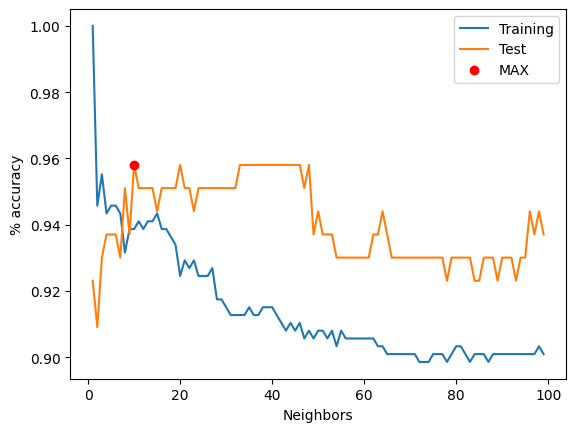

Max accuracy by KNN: 0.958041958041958


In [10]:
# K Nearset Neighbour

if __name__ == "__main__":
    initial_analysis = CancerAnalysis(r"C:\Users\91790\Downloads\wisc_bc_data.csv", index=425)
    
    # Execute KNN algorithm
    knn_accuracy = initial_analysis.byknn()
    print("Max accuracy by KNN:", knn_accuracy)


Result By Random Forest Classifier
Max Test Accuracy: 0.9790209790209791 at Estimators = 4


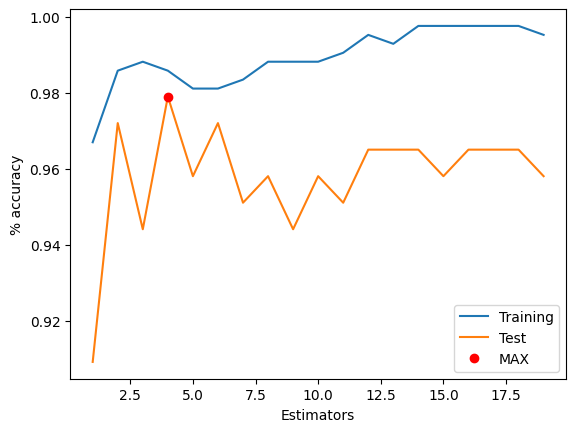

Max accuracy by Random Forest: 0.9790209790209791


In [11]:
# Random Forest

if __name__ == "__main__":
    initial_analysis = CancerAnalysis(r"C:\Users\91790\Downloads\wisc_bc_data.csv", index=425)
    
    # Execute Random Forest algorithm
    random_forest_accuracy = initial_analysis.byrandom()
    print("Max accuracy by Random Forest:", random_forest_accuracy)


Result By Random Forest Classifier
Max Test Accuracy: 0.9702380952380952 at Estimators = 10


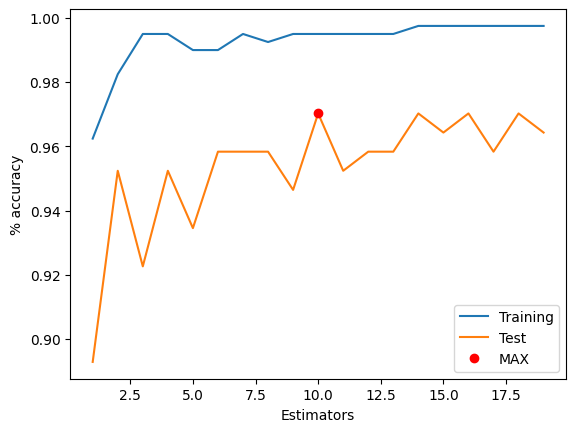

Accuracy for training data size 400 : 0.9702380952380952
Result By Random Forest Classifier
Max Test Accuracy: 0.9754601226993865 at Estimators = 2


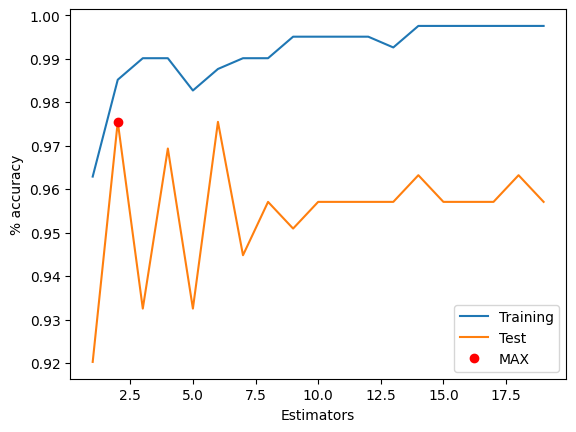

Accuracy for training data size 405 : 0.9754601226993865
Result By Random Forest Classifier
Max Test Accuracy: 0.9810126582278481 at Estimators = 6


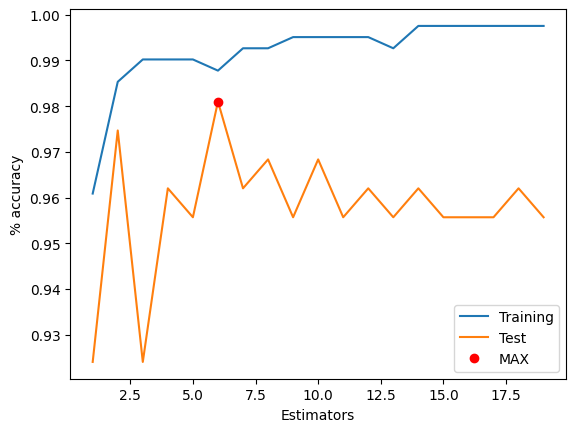

Accuracy for training data size 410 : 0.9810126582278481
Result By Random Forest Classifier
Max Test Accuracy: 0.9738562091503268 at Estimators = 2


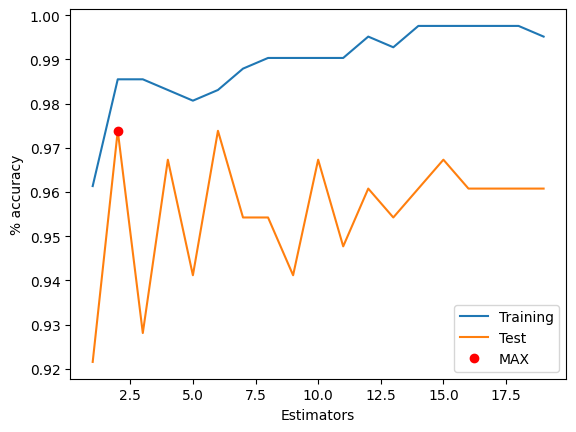

Accuracy for training data size 415 : 0.9738562091503268
Result By Random Forest Classifier
Max Test Accuracy: 0.972972972972973 at Estimators = 2


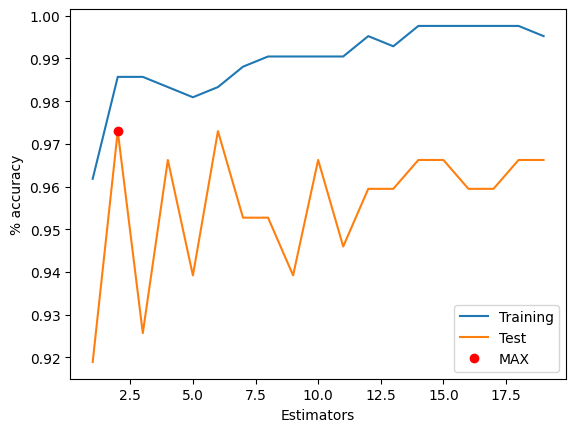

Accuracy for training data size 420 : 0.972972972972973
Result By Random Forest Classifier
Max Test Accuracy: 0.9790209790209791 at Estimators = 4


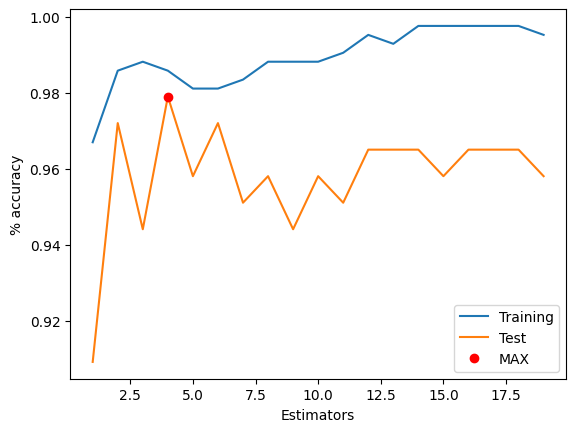

Accuracy for training data size 425 : 0.9790209790209791
Result By Random Forest Classifier
Max Test Accuracy: 0.9782608695652174 at Estimators = 4


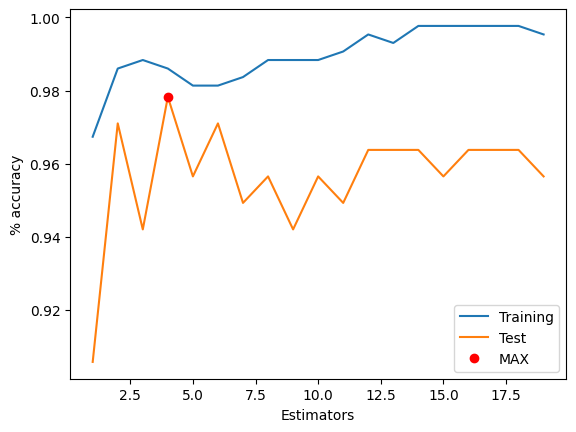

Accuracy for training data size 430 : 0.9782608695652174
Result By Random Forest Classifier
Max Test Accuracy: 0.9774436090225563 at Estimators = 4


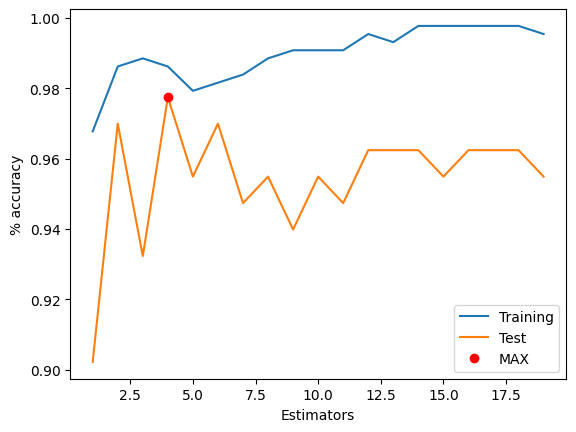

Accuracy for training data size 435 : 0.9774436090225563
Result By Random Forest Classifier
Max Test Accuracy: 0.9765625 at Estimators = 4


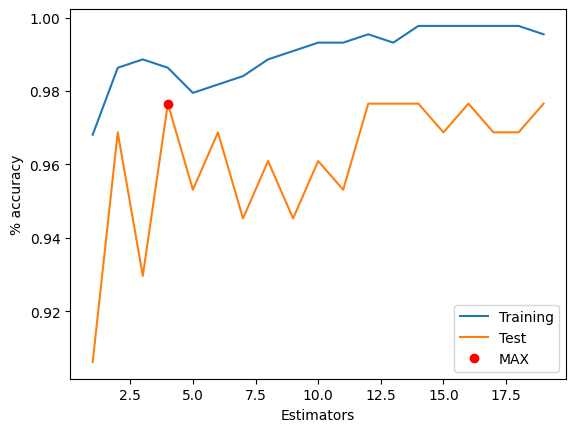

Accuracy for training data size 440 : 0.9765625
Result By Random Forest Classifier
Max Test Accuracy: 0.975609756097561 at Estimators = 4


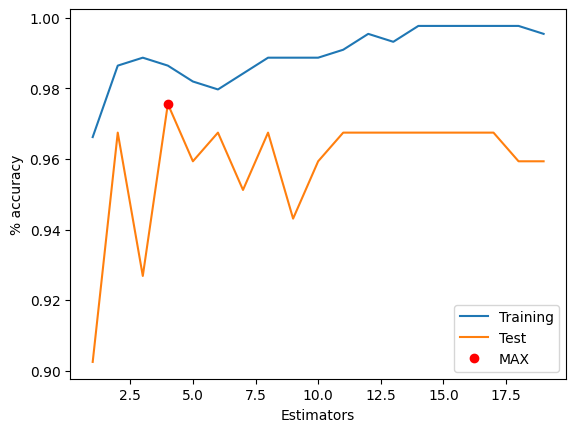

Accuracy for training data size 445 : 0.975609756097561
Result By Random Forest Classifier
Max Test Accuracy: 0.9830508474576272 at Estimators = 14


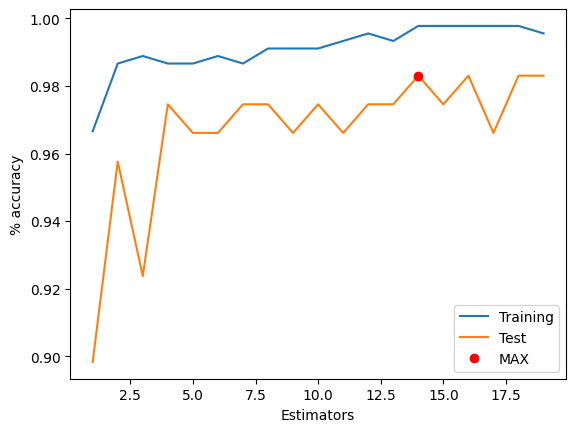

Accuracy for training data size 450 : 0.9830508474576272
Result By Random Forest Classifier
Max Test Accuracy: 0.9823008849557522 at Estimators = 14


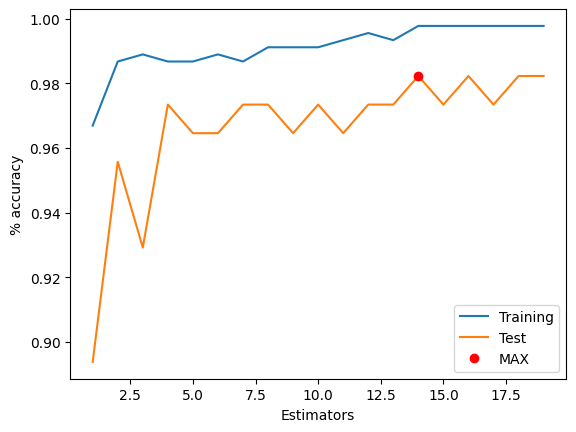

Accuracy for training data size 455 : 0.9823008849557522
Result By Random Forest Classifier
Max Test Accuracy: 0.9907407407407407 at Estimators = 18


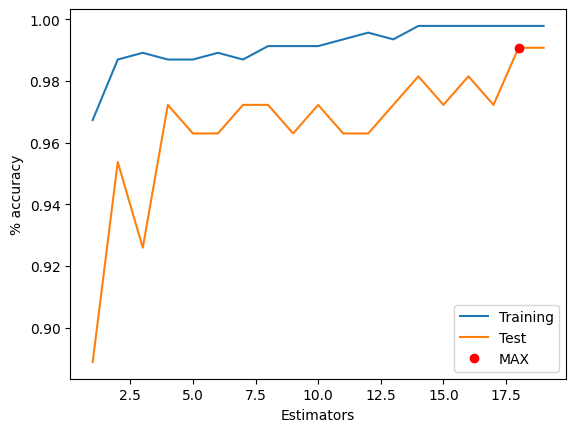

Accuracy for training data size 460 : 0.9907407407407407
Result By Random Forest Classifier
Max Test Accuracy: 0.9902912621359223 at Estimators = 18


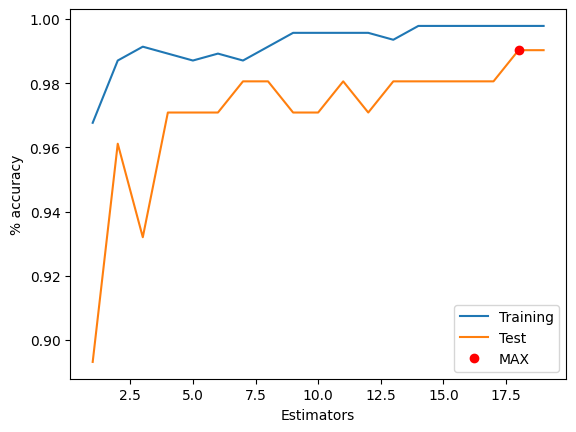

Accuracy for training data size 465 : 0.9902912621359223
Result By Random Forest Classifier
Max Test Accuracy: 0.9897959183673469 at Estimators = 7


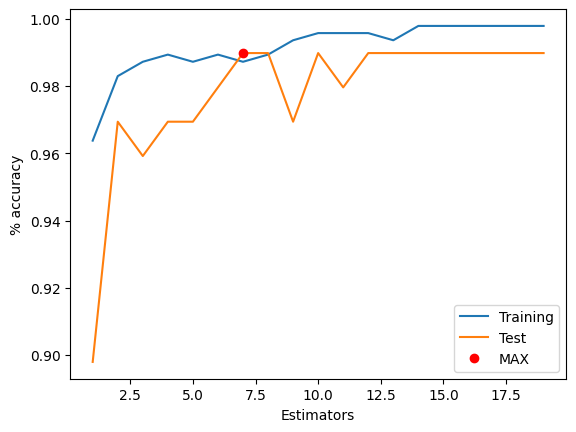

Accuracy for training data size 470 : 0.9897959183673469
Result By Random Forest Classifier
Max Test Accuracy: 0.989247311827957 at Estimators = 13


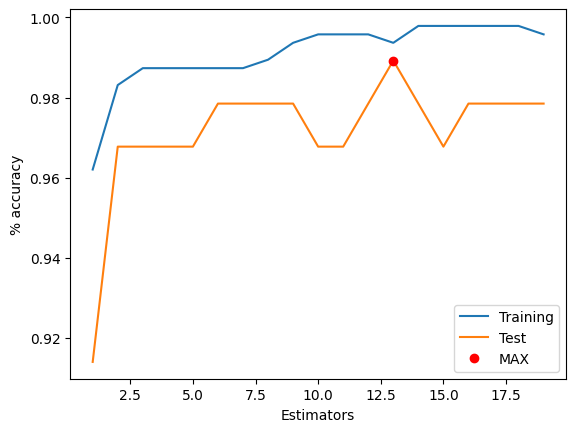

Accuracy for training data size 475 : 0.989247311827957
Result By Random Forest Classifier
Max Test Accuracy: 0.9886363636363636 at Estimators = 4


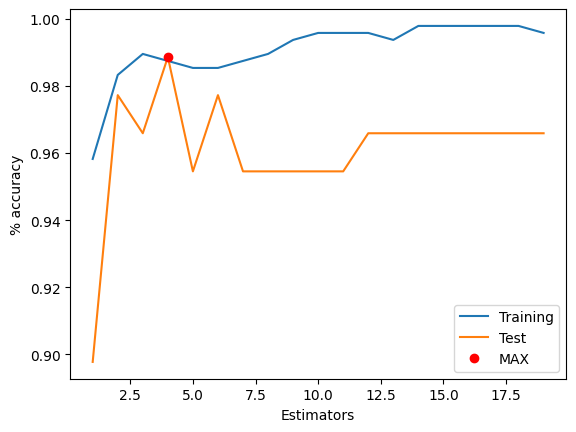

Accuracy for training data size 480 : 0.9886363636363636
Result By Random Forest Classifier
Max Test Accuracy: 1.0 at Estimators = 7


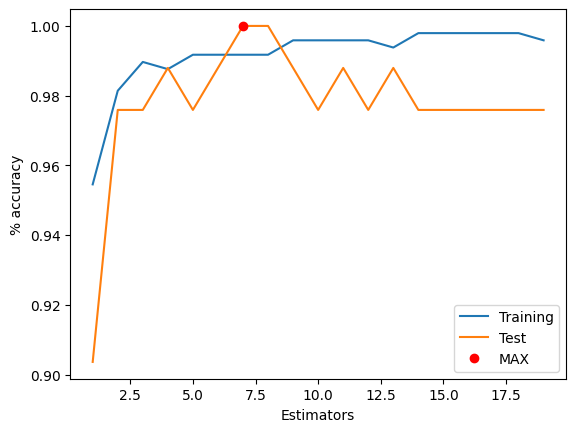

Accuracy for training data size 485 : 1.0
Result By Random Forest Classifier
Max Test Accuracy: 0.9871794871794872 at Estimators = 4


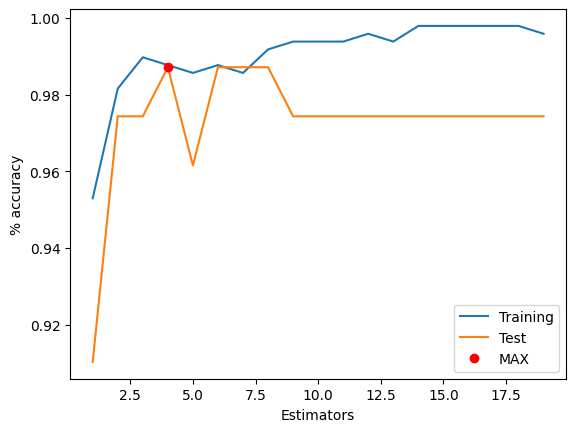

Accuracy for training data size 490 : 0.9871794871794872
Result By Random Forest Classifier
Max Test Accuracy: 0.9863013698630136 at Estimators = 4


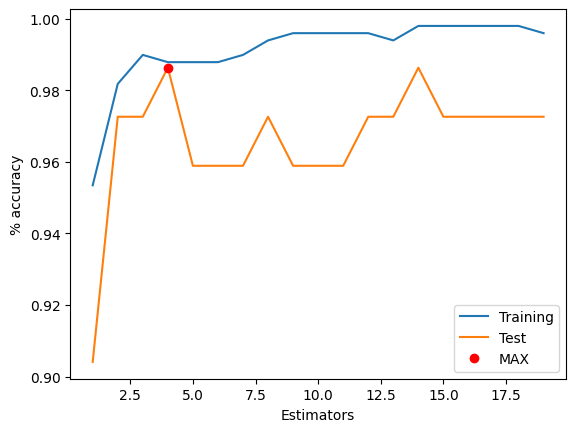

Accuracy for training data size 495 : 0.9863013698630136
Result By Random Forest Classifier
Max Test Accuracy: 0.9852941176470589 at Estimators = 4


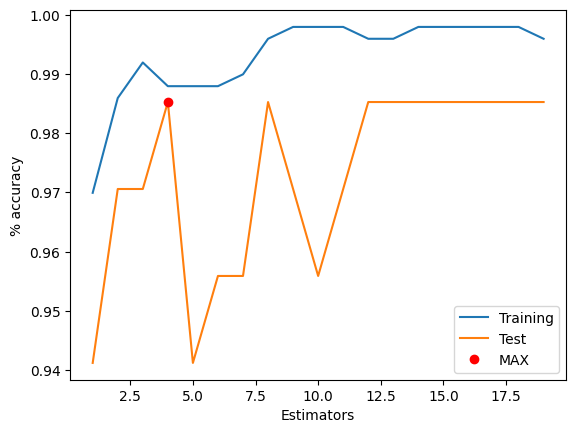

Accuracy for training data size 500 : 0.9852941176470589
Result By Random Forest Classifier
Max Test Accuracy: 0.9841269841269841 at Estimators = 4


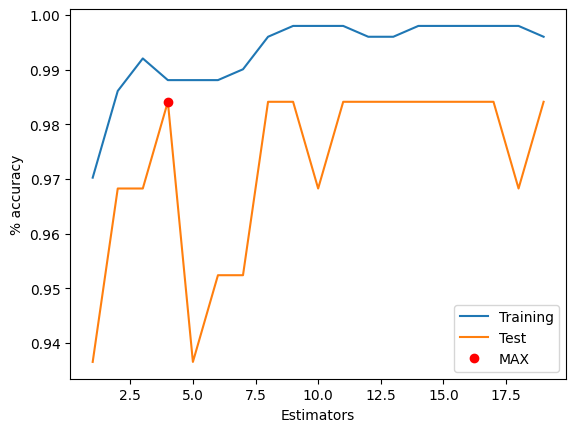

Accuracy for training data size 505 : 0.9841269841269841
Result By Random Forest Classifier
Max Test Accuracy: 1.0 at Estimators = 6


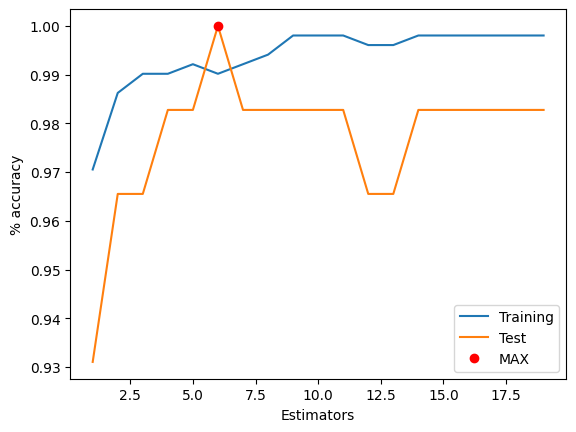

Accuracy for training data size 510 : 1.0
Result By Random Forest Classifier
Max Test Accuracy: 0.9811320754716981 at Estimators = 2


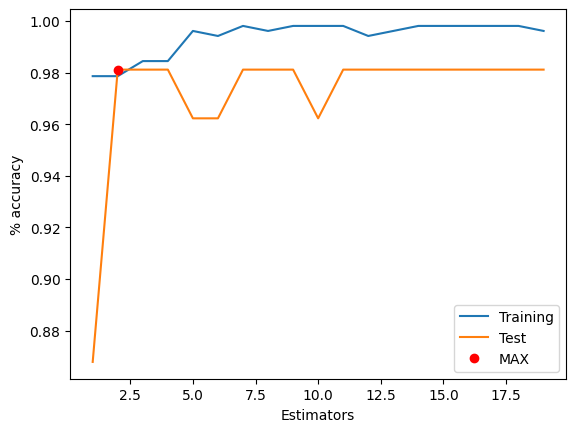

Accuracy for training data size 515 : 0.9811320754716981
Result By Random Forest Classifier
Max Test Accuracy: 0.9791666666666666 at Estimators = 2


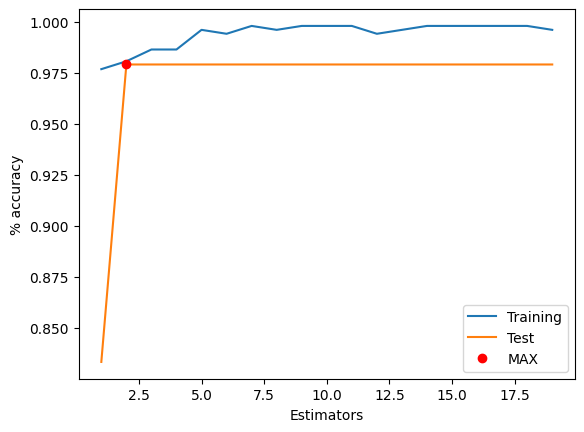

Accuracy for training data size 520 : 0.9791666666666666
Result By Random Forest Classifier
Max Test Accuracy: 1.0 at Estimators = 4


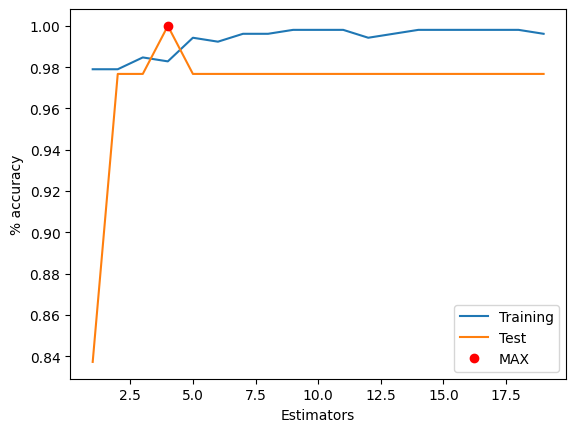

Accuracy for training data size 525 : 1.0
Result By Random Forest Classifier
Max Test Accuracy: 0.9736842105263158 at Estimators = 2


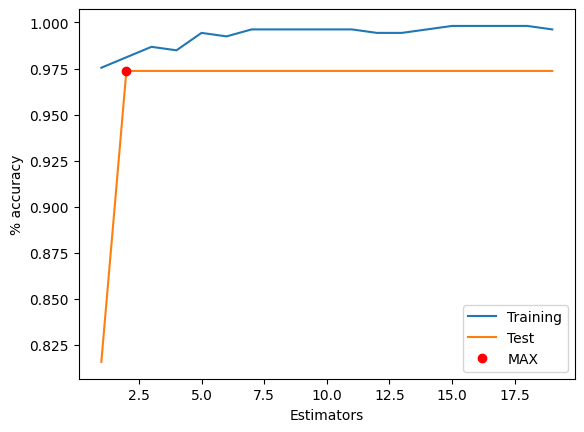

Accuracy for training data size 530 : 0.9736842105263158
Result By Random Forest Classifier
Max Test Accuracy: 0.9696969696969697 at Estimators = 2


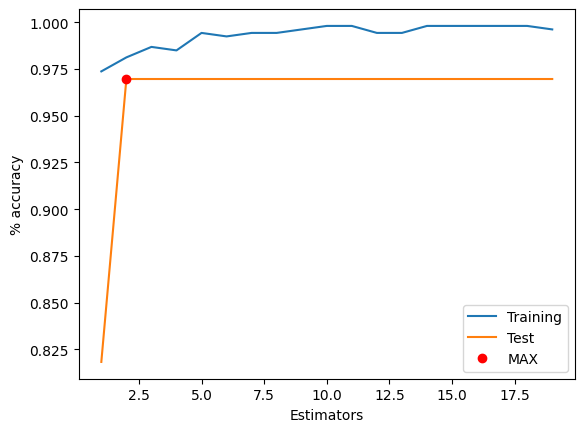

Accuracy for training data size 535 : 0.9696969696969697


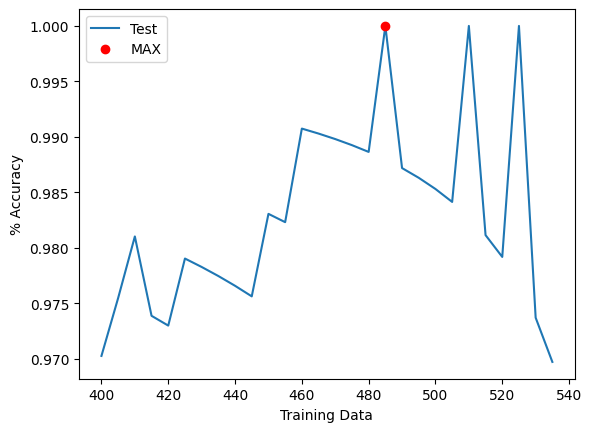

In [12]:
# Training Data Size Variation

if __name__ == "__main__":
    acc = []
    for i in range(400, 540, 5):
        current_analysis = CancerAnalysis(r"C:\Users\91790\Downloads\wisc_bc_data.csv", i)
        current_accuracy = current_analysis.byrandom()  # You can change this to any algorithm you want to test
        print("Accuracy for training data size", i, ":", current_accuracy)
        acc.append(current_accuracy)
    
    # Plot the results
    plt.plot(range(400, 540, 5), acc, label="Test")
    plt.xlabel('Training Data')
    plt.ylabel('% Accuracy')
    
    max_acc_index = acc.index(max(acc))
    plt.plot(max_acc_index * 5 + 400, max(acc), 'ro', label="MAX")
    
    plt.legend()
    plt.show()


Result By Logistic Regression
0.9440559440559441
0.9440559440559441
0.951048951048951
0.951048951048951
0.9440559440559441
0.951048951048951
0.951048951048951
0.951048951048951
0.951048951048951
0.951048951048951
0.951048951048951
0.951048951048951
0.951048951048951
0.958041958041958
0.951048951048951
0.951048951048951
0.951048951048951
0.951048951048951
0.951048951048951
0.951048951048951
0.951048951048951
0.951048951048951
0.951048951048951
0.951048951048951
0.951048951048951
0.951048951048951
0.951048951048951
0.951048951048951
0.951048951048951
Max Accuracy 0.958041958041958At Inverse Regularization = 14


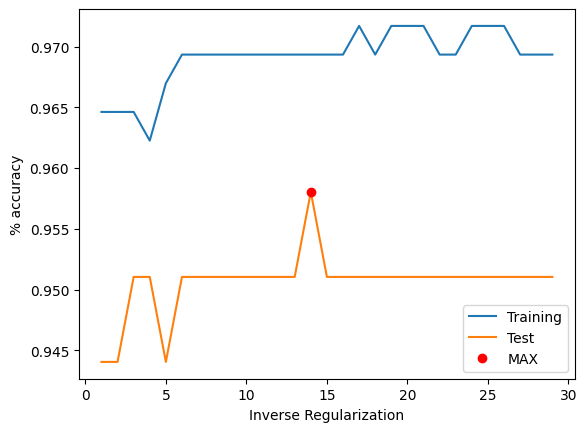

Max accuracy by Logistic Regression: 0.958041958041958


In [6]:
if __name__ == "__main__":
    initial_analysis = CancerAnalysis(r"C:\Users\91790\Downloads\wisc_bc_data.csv", index=425)
    
    # Execute Logistic Regression algorithm
    logistic_accuracy = initial_analysis.bylogistic()
    print("Max accuracy by Logistic Regression:", logistic_accuracy)

Result By SVM


c:\users\91790\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\users\91790\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.7902097902097902
0.958041958041958


c:\users\91790\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\users\91790\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9230769230769231
0.9440559440559441


c:\users\91790\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\users\91790\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9300699300699301
0.958041958041958


c:\users\91790\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\users\91790\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8321678321678322
0.9300699300699301


c:\users\91790\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\users\91790\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9230769230769231
0.9440559440559441


c:\users\91790\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8531468531468531
0.951048951048951


c:\users\91790\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\users\91790\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\users\91790\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8671328671328671
0.9230769230769231


c:\users\91790\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9440559440559441


c:\users\91790\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\users\91790\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8531468531468531
0.9440559440559441


c:\users\91790\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\users\91790\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.6573426573426573
0.951048951048951


c:\users\91790\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\users\91790\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9090909090909091
0.9370629370629371


c:\users\91790\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\users\91790\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9230769230769231
0.6993006993006993
0.9440559440559441


c:\users\91790\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\users\91790\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9370629370629371


c:\users\91790\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\users\91790\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.951048951048951
0.9440559440559441


c:\users\91790\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\users\91790\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.951048951048951
0.9300699300699301
Max Accuracy 0.958041958041958At Inverse Regularization = 2


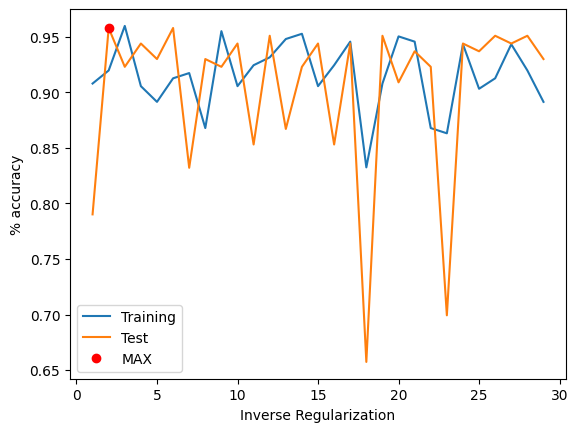

Max accuracy by SVM: 0.958041958041958


In [13]:
# Support Vector Machine

if __name__ == "__main__":
    initial_analysis = CancerAnalysis(r"C:\Users\91790\Downloads\wisc_bc_data.csv", index=425)
    
    # Execute SVM algorithm
    svm_accuracy = initial_analysis.bysvm()
    print("Max accuracy by SVM:", svm_accuracy)

Result By Decision Tree Classifier
0.8951048951048951
0.8951048951048951
0.8881118881118881
0.8881118881118881
0.9230769230769231
0.9230769230769231
0.9230769230769231
0.9090909090909091
0.9090909090909091
Max Accuracy 0.9230769230769231At Prepruining = 5


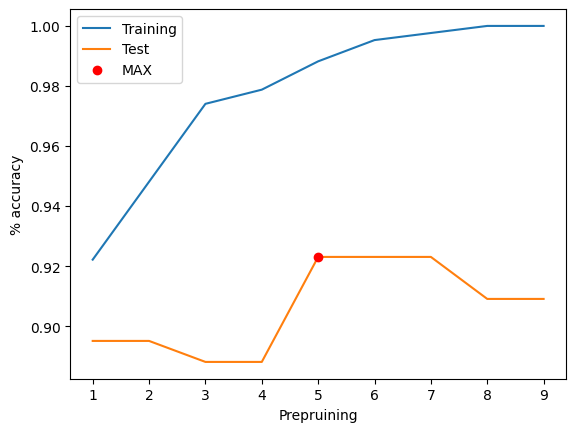

Max accuracy by Decision Tree Classifier: 0.9230769230769231


In [14]:
# Decision Tree Classifier

if __name__ == "__main__":
    initial_analysis = CancerAnalysis(r"C:\Users\91790\Downloads\wisc_bc_data.csv", index=425)
    
    # Execute Decision Tree Classifier algorithm
    decision_tree_accuracy = initial_analysis.bydtree()
    print("Max accuracy by Decision Tree Classifier:", decision_tree_accuracy)

In [16]:
# Naive Bayes Classifier

if __name__ == "__main__":
    initial_analysis = CancerAnalysis(r"C:\Users\91790\Downloads\wisc_bc_data.csv", index=425)
    
    # Execute Naive Bayes Classifier algorithm
    nb_accuracy = initial_analysis.byNB()
    print("Accuracy by Naive Bayes Classifier:", nb_accuracy)

Result By Naive Bayes Classifier
Accuracy by Naive Bayes Classifier: 0.965034965034965


Result By Gradient Boost
0.958041958041958
0.986013986013986
0.986013986013986
0.916083916083916
0.9230769230769231
0.9230769230769231
0.9230769230769231
0.9090909090909091
0.9090909090909091
Max Accuracy 0.986013986013986At Estimators = 2


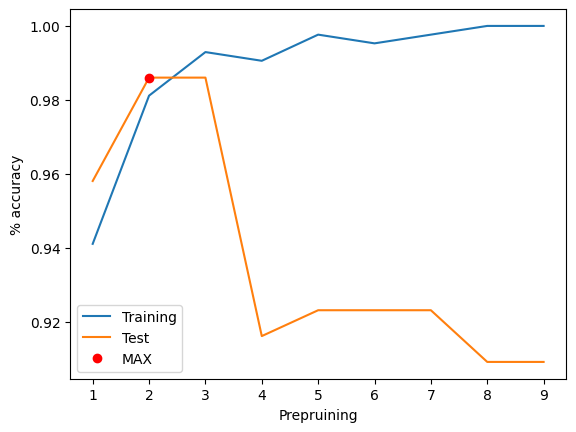

Max accuracy by Gradient Boosting: 0.986013986013986


In [17]:
# Gradient Boosting

if __name__ == "__main__":
    initial_analysis = CancerAnalysis(r"C:\Users\91790\Downloads\wisc_bc_data.csv", index=425)
    
    # Execute Gradient Boosting algorithm
    gradient_boost_accuracy = initial_analysis.bygradientboost()
    print("Max accuracy by Gradient Boosting:", gradient_boost_accuracy)


Result using Polynomial Kernel
Max Accuracy 0.986013986013986At Degree = 3


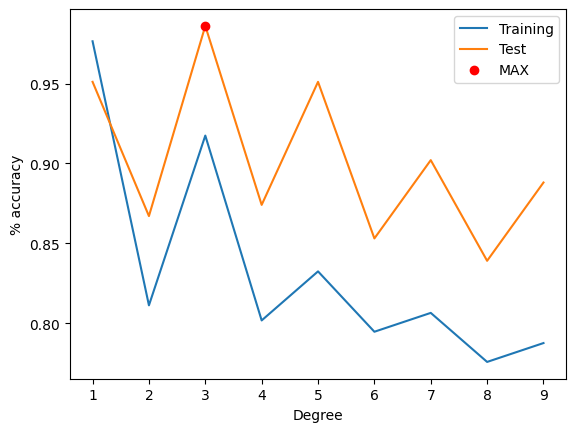

Max accuracy using Polynomial Kernel SVM: 0.986013986013986


In [18]:
# Polynomial Kernel SVM Algorithm

if __name__ == "__main__":
    initial_analysis = CancerAnalysis(r"C:\Users\91790\Downloads\wisc_bc_data.csv", index=425)
    
    # Execute Polynomial Kernel SVM algorithm
    poly_svm_accuracy = initial_analysis.bypolysvm()
    print("Max accuracy using Polynomial Kernel SVM:", poly_svm_accuracy)

In [20]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
from tabulate import tabulate

algorithm_accuracies = [
    ("KNN", knn_accuracy),
    ("Logistic Regression", logistic_accuracy),
    ("SVM", svm_accuracy),
    ("Decision Tree", decision_tree_accuracy),
    ("Naive Bayes", nb_accuracy),
    ("Gradient Boosting", gradient_boost_accuracy),
    ("Polynomial Kernel SVM", poly_svm_accuracy)
]

# Tabulate the results
table = tabulate(algorithm_accuracies, headers=["Algorithm", "Accuracy"], tablefmt="grid")

print(table)


+-----------------------+------------+
| Algorithm             |   Accuracy |
+=======================+============+
| KNN                   |   0.958042 |
+-----------------------+------------+
| Logistic Regression   |   0.958042 |
+-----------------------+------------+
| SVM                   |   0.958042 |
+-----------------------+------------+
| Decision Tree         |   0.923077 |
+-----------------------+------------+
| Naive Bayes           |   0.965035 |
+-----------------------+------------+
| Gradient Boosting     |   0.986014 |
+-----------------------+------------+
| Polynomial Kernel SVM |   0.986014 |
+-----------------------+------------+


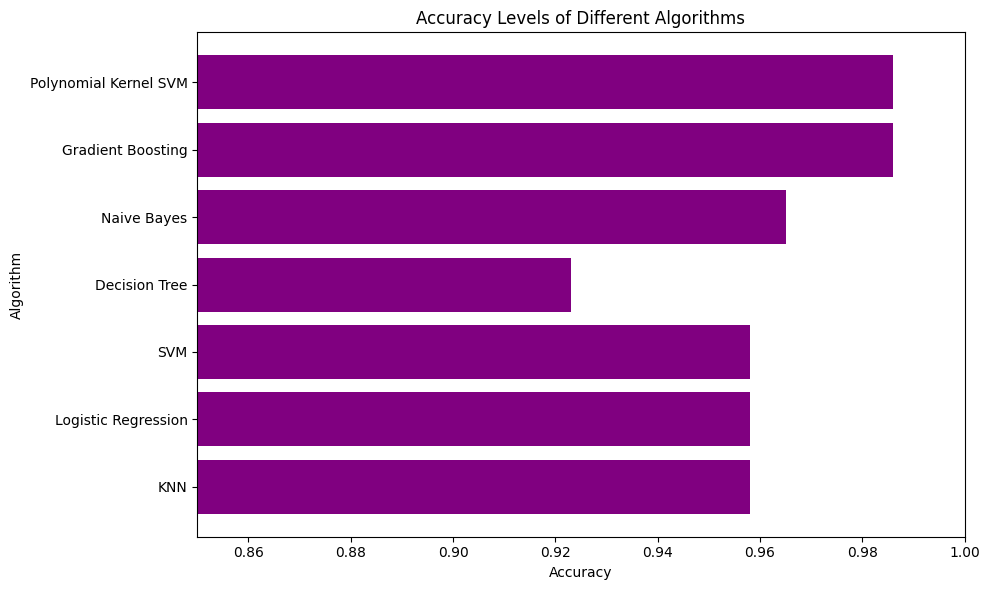

In [25]:
import matplotlib.pyplot as plt

algorithm_names = [item[0] for item in algorithm_accuracies]
accuracy_values = [item[1] for item in algorithm_accuracies]

plt.figure(figsize=(10, 6))
plt.barh(algorithm_names, accuracy_values, color='purple')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
plt.title('Accuracy Levels of Different Algorithms')
plt.xlim(0.85, 1.0)  # Set x-axis limit from 0.85 to 1.0
plt.tight_layout()
plt.show()
